# **Preparação**

In [4]:
#importar pacotes pandas, seaborn e statistics
import pandas as pd
import seaborn as str
import statistics as sts

In [5]:
#importar datafreme
df = pd.read_csv('tempo.csv', sep = ';')

In [6]:
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [7]:
df.shape

(14, 5)

# **Analise Exploratoria**

In [8]:
#Explorar dados categoricos das aparencias
agrup_aparencia = df.groupby(['Aparencia']).size()
agrup_aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

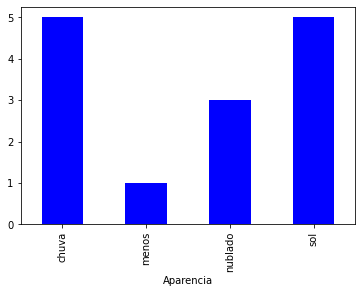

In [9]:
#Explorar atravez de graficos de barra
agrup_aparencia.plot.bar(color = 'blue')

In [10]:
#Obs identificado variaveis de aparencia que deverão ser ajustadas

In [11]:
#Explorar dados categoricos dos ventos
agrup_vento = df.groupby(['Vento']).size()
agrup_vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<AxesSubplot:xlabel='Vento'>

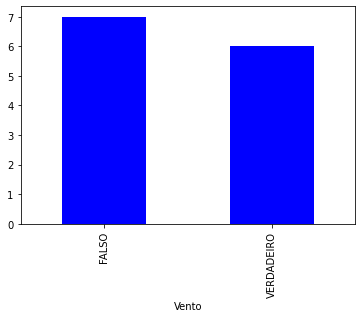

In [12]:
#Explorar atravez de graficos de barra
agrup_vento.plot.bar(color = 'blue')

In [13]:
#Explorar dados categoricos sobre Jogar
agrup_jogar = df.groupby(['Jogar']).size()
agrup_jogar

Jogar
nao    5
sim    9
dtype: int64

<AxesSubplot:xlabel='Jogar'>

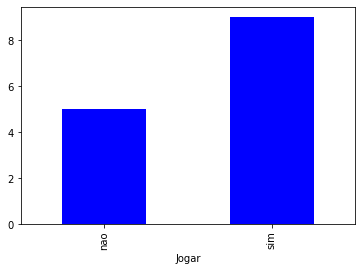

In [14]:
#Explorar atravez de graficos de barra
agrup_jogar.plot.bar(color = 'blue')

In [15]:
#Explorar dados numericos das temperaturas
df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

C:\Users\fabricio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperaturas')

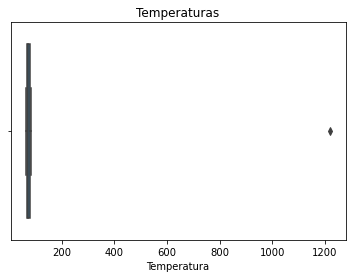

In [16]:
#Explorar dados numericos por box plot
str.boxplot(df['Temperatura']).set_title('Temperaturas')

C:\Users\fabricio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperaturas')

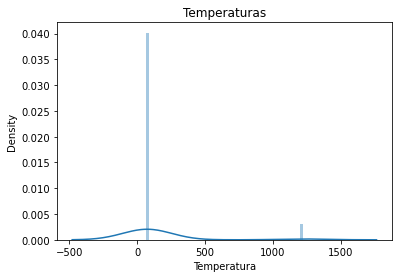

In [17]:
#Explorar atraves de um histograma
str.distplot(df['Temperatura']).set_title('Temperaturas')

In [18]:
#Obs: Com as analises realizadas no campo temperaturas descobrimos um outlier que será substituidos pela mediana

In [19]:
#Explorar dados numericos da umidade
df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

C:\Users\fabricio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

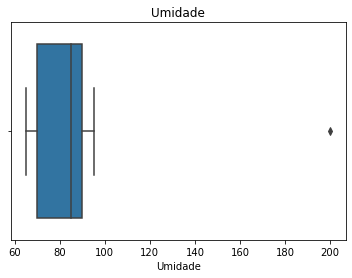

In [20]:
#Explorar dados numeros atravez de um box plot
str.boxplot(df['Umidade']).set_title('Umidade')

C:\Users\fabricio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umidade')

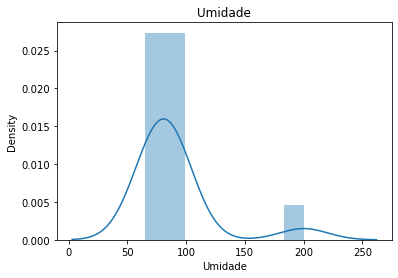

In [21]:
str.distplot(df['Umidade']).set_title('Umidade')

In [22]:
#Obs: Com as analises realizadas no campo umidade descobrimos um outlier que será substituidos pela mediana

In [23]:
#Verificar dados faltantes
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [24]:
#Obs: acrescentar valores faltantes pela mediana no caso da umidade e moda para o vento

# **Tratamento de Dados**

In [25]:
#Erro 1
#Obs identificado variaveis de aparencia que deverão ser ajustadas
#Erro 2
#Obs: Com as analises realizadas no campo temperaturas descobrimos um outlier que será substituidos pela mediana
#Erro 3
#Obs: Com as analises realizadas no campo umidade descobrimos um outlier que será substituidos pela mediana
#Erro 4
#Obs: Acrescentar valores faltantes pela mediana no caso da umidade e moda para o vento


In [26]:
#Erro 1
#solucionar fazendo a substituição da variavel errada pela moda
agrupados_aparencia = df.groupby(['Aparencia']).size()
agrupados_aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [27]:
#Padronizar pela moda
df.loc[df['Aparencia'] == 'menos', 'Aparencia'] ='sol'

In [28]:
#Erro 1
#Verificar se o problema foi resolvido
agrupados_aparencia = df.groupby(['Aparencia']).size()
agrupados_aparencia

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [29]:
#Erro 2
#Solução fazer a detecção dos outliers e trocar pela mediana
df.loc[df['Temperatura'] > 130]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [30]:
#Erro 2
#Descobrir a mediana 
mediana = sts.median(df['Temperatura'])
mediana

73.5

In [31]:
#Erro 2
#Substituir outlier pela mediana
df.loc[df['Temperatura'] == 1220, 'Temperatura'] = mediana

In [32]:
#Erro 2
#Verificar se o problema foi Corrigido
df.loc[df['Temperatura'] > 130]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [33]:
#Erro 3
#solução fazer a destecção do outlier e substituir pela media
df.loc[df['Umidade'] > 100]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [34]:
#Erro 3
#Verificar a mediana da umidade
mediana_umi = sts.median(df['Umidade'])
mediana_umi

85.5

In [35]:
#Erro 3
#Padronizar a umidade outlier pela mediana
df.loc[df['Umidade'] == 200, 'Umidade'] = mediana_umi

In [36]:
#Erro 3
#Verificar se o outlier persiste
df.loc[df['Umidade'] > 100]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [37]:
#Erro 4
#Solução trocar por mediana e moda os valores faltentes da umidade e do vento
#Descobri a moda da coluna vento
agroup_vent = df.groupby(df['Vento']).size()
agroup_vent

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [38]:
#Erro 4
#Solução trocar por mediana e moda os valores faltentes da umidade e do vento
df['Umidade'].fillna(mediana_umi, inplace = True)
df['Vento'].fillna('Falso', inplace = True)

In [39]:
#Erro 4
#Verificar se resta campos para preenchimento.
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [40]:
df.head(14)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,Falso,sim


In [41]:
df.shape

(14, 5)

In [42]:
df.to_csv('tempoTratado.csv')